# Travail de Phys-F302

## Introduction.

Ce travail consiste en la résolution de l'équation différentielle linéaire

\begin{equation}
    \frac{d^4 f}{dx^4} - 5 \frac{d^2 f}{dx^2} + 4 f = 0 
\end{equation}

avec $f(x) : [0,1] \longrightarrow \mathbb{R}$. Nous avons les conditions initiales:

\begin{align}
     f(0) &= a \\
     f'(0) &= b \\
     f(1) &= c \\
     f'(1) &= d
\end{align}

La première étape consiste à trouver une solution générale à cette équation. La deuxième étape est d'écrire un code qui donne la solution de cette équation en fonction des conditions aux bords.
La troisième étape est de donner la solution avec des conditions aux bords données. La quatrième étape est de résoudre l'équation par la méthode Gauss-Seidel. La cinquième étape est résoudre l'équation avec la méthode du gradient conjugué.

### Remarque

Pour que toutes les fonctions du notebook fonctionnent correctement, il est impératif d'exécuter toutes les cellules du notebook dans l'ordre.

In [1]:
import sympy as sy
sy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

## Question 1

Quelle est la solution générale de l'équation $\frac{d^4 f}{dx^4} - 5 \frac{d^2 f}{dx^2} + 4 f = 0 $ ?

Comme on a une equation différentielle linéaire à coefficients constants, on cherche une solution de la forme
\begin{equation}
    f(x) = k e^{\lambda x}
\end{equation}
avec $\lambda, k \in \mathbb{R}$ des constantes

On remplace dans l'équation différentielle et on trouve
\begin{align*}
    \frac{d^4 k e^{\lambda x}}{dx^4} - 5 \frac{d^2 k e^{\lambda x}}{dx^2} + 4 k e^{\lambda x} &= 0 \\
    k \lambda^4 e^{\lambda x} - 5 k \lambda^2 e^{\lambda x} + 4 k e^{\lambda x} &= 0
\end{align*}
    
On met en évidence $k e^{\lambda x}$:
\begin{equation}
    (\lambda^4 - 5\lambda^2 + 4) k e^{\lambda x} = 0.
\end{equation}

Cette dernière équation permet de voir qu'on peu toujours poser $k=1$ sans perdre de généralité dans la solution
\begin{equation}
    (\lambda^4 - 5\lambda^2 + 4) e^{\lambda x} = 0
\end{equation}

Vu que $e^{\lambda x} \neq 0$ pour tout $\lambda \in \mathbb{R}$ et $x \in [0,1]$, il vient que 
\begin{equation}
    \lambda^4 - 5\lambda^2 + 4 = 0.
\end{equation}

C'est l'équation caractéristique de l'équation différentielle $\frac{d^4 f}{dx^4} - 5 \frac{d^2 f}{dx^2} + 4 f = 0$. Cette équation bicarrée se résous facilement en posant $u = \lambda^2$.
\begin{align}
    \lambda^4 - 5\lambda^2 + 4 &= 0 \\
    u^2 - 5u + 4 &= 0 \\
    \frac{5 \pm \sqrt{9}}{2} = \{1,4\} &= u \\
    \sqrt{u} = \{-2, -1, 1, 2\} &= \lambda
\end{align}

Toutes les racines du polynome caractéristique sont réelles. Le principe de superposition des solutions d'une équation différentielle linéaire à coefficients constants permet d'écrire la solution générale:
\begin{equation}
    f(x) = c_1 e^{-2 x} + c_2 e^{- x} + c_3 e^{x} + c_4 e^{2 x}
\end{equation}

Où les $c_{1,2,3,4}$ sont des constantes réelles.

On peut facilement vérifier cette solution en faisant appel au calcul symbolique et à la bibliothèque sympy.

In [2]:
x = sy.symbols('x') #On définit la variable
f = [0,0,0,0,0]
f[0] = sy.Function("f")(x) #On définit la fonction qui sera solution de l'équation.
for i in range(1,5):
    f[i] = sy.Derivative(f[i-1],x) #On crée un tableau avec la fonction et ses dérivées jusqu'à l'ordre 4
eq = f[4] - 5*f[2] + 4*f[0] #On définit l'équation différentielle
sol = sy.dsolve(eq) #on vérifie la solution obtenue à la question 1
sol

## Question 2

Ecrire un code en python qui permet d'évaluer les constantes d'intégration de la solution générale en termes des conditions aux bords.

In [3]:
x = sy.symbols('x')
C1, C2, C3, C4 = sy.symbols("C_1, C_2, C_3, C_4")
a, b, c, d = sy.symbols("a, b, c, d")   #On définit tous les symboles utiles aux calculs des conditions initiales
ff = lambda x: C1*sy.exp(-2*x) + C2*sy.exp(-1*x) + C3*sy.exp(x) + C4*sy.exp(2*x) #On exprime la solution comme une fonction utilisable
ff_prime = sy.Derivative(ff(x),x).doit()
sy.Eq(sy.Derivative(ff(x),x), ff_prime) #on calcule la dérivée de la solution

In [4]:
ff_prime = lambda x: -2 * C1 *sy.exp(-2 * x) - C2 * sy.exp(-x) + C3 * sy.exp(x) + 2 * C4 * sy.exp(2*x) #on exprime la dérivée de la solution comme une fonction utilisable.
#Maintenant on va exprimer les conditions aux bords.
sy.Eq(ff(0),a) #condition 1 

In [5]:
sy.Eq(ff_prime(0),b) #condition 2

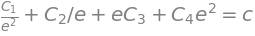

In [6]:
sy.Eq(ff(1),c) #condition 3

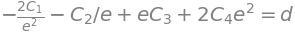

In [7]:
sy.Eq(ff_prime(1),d) #condition 4

Maintenant il suffit de résoudre ce système de 4 équations à 4 inconnues en fonction des paramètres $a, b, c, d$.

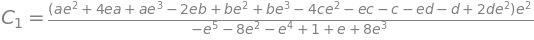

In [8]:
cond1 = C1+ C2+ C3+ C4-a
cond2 = -2 * C1 - C2+ C3+ 2 * C4 -b
cond3 = C1*sy.exp(-2)+ C2*sy.exp(-1)+ sy.exp(1)*C3+ C4*sy.exp(2) -c
cond4 = -2*C1*sy.exp(-2) - C2*sy.exp(-1)+ sy.exp(1)*C3+ 2*C4*sy.exp(2) - d  #On rend les conditions initiales utilisables

aa = sy.linsolve([cond1, cond2, cond3, cond4],(C1, C2, C3, C4)) #On résout le système d'équations avec une fonction de sympy
c1, c2, c3, c4 = next(iter(aa)) #j'assigne chaque coefficient d'intégration à sa valeur
c1, c2, c3, c4 = sy.simplify(c1), sy.simplify(c2), sy.simplify(c3), sy.simplify(c4) #On simplifie l'expression des coefficients d'intégration
sy.Eq(C1,c1)  #On 'return' l'expression de C1

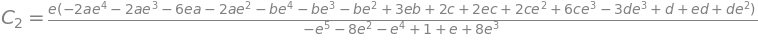

In [9]:
sy.Eq(C2,c2)  #On 'return' l'expression de C2

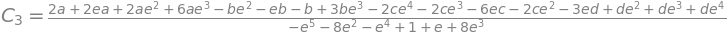

In [10]:
sy.Eq(C3,c3)  #On 'return' l'expression de C3

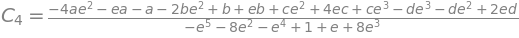

In [11]:
sy.Eq(C4,c4)  #On 'return' l'expression de C4

On peut vérifier simplement que l'expression des constantes d'intégration est juste en reprenant le calcul d'une des conditions aux bords.

In [12]:
sy.simplify(-2*c1 - c2+ c3 + 2*c4)

On trouve bien le résultat attendu, ça nous indique qu'on est sur la bonne voie et qu'on n'a pas fait de faute dans les variables qu'on a déclaré.

On va maintenant chercher une expression numérique (qui dépendra toujours des paramètres $a, b, c, d$) des coefficients d'intégration et on va les garder dans un array numpy.

In [13]:
int_coeff = np.array([c1, c2, c3, c4])  #On garde les valeurs 'numériques' dans une liste numpy

for i in range(4):
    print("C%i = " %(i+1), int_coeff[i].evalf())    #On 'print' les valurs de la liste numpy via une boucle.

C1 =  -2.89961147379158*a - 1.66637605175129*b + 2.51600718861832*c - 0.836274249325834*d
C2 =  5.01966948343588*a + 2.05615278382493*b - 3.97022065296834*c + 1.36717111145998*d
C3 =  -1.46056255514131*a - 0.502954144469639*b + 1.84663320443173*c - 0.75641633707662*d
C4 =  0.340504545497014*a + 0.113177412395997*b - 0.392419740081715*c + 0.225519474942469*d


On peut donc exprimer la solution de l'équation différentielle en fonction des conditions initiales

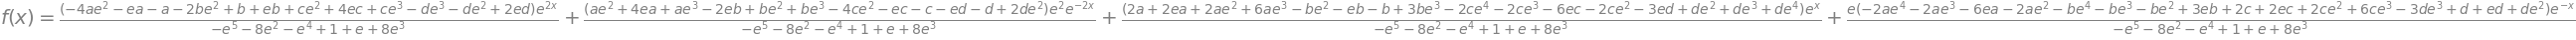

In [14]:
ff = lambda x: c1*sy.exp(-2*x) + c2*sy.exp(-1*x) + c3*sy.exp(x) + c4*sy.exp(2*x) #On redéfinit la solution de l'équation avec la nouvelle expression des coefficients d'intégration.
sy.Eq(f[0],ff(x))

On peut également donner une valeur numérique (de nouveau, on aura toujours les paramètres $a, b, c, d$) de la solution.

In [15]:
sy.Eq(f[0],sy.expand(ff(x).evalf()))

## Question 3

Que vaut la solution de l'équation (1) pour $a=0, b=0, c=1, d=-1$. Représentez cette fonction sur un graphique.

In [16]:
#On pose les conditions aux bords à remplacer dans l'array numpy "int_coeff".
cond = [(a,0), (b,0), (c,1), (d,-1)]

#On redéfinit les coefficient d'intégration en remplaçant les paramètres a, b, c, d par les valeurs données via la fonction "subs" de sympy
C1 = int_coeff[0].subs(cond)
C2 = int_coeff[1].subs(cond)
C3 = int_coeff[2].subs(cond)
C4 = int_coeff[3].subs(cond)

print("C1 =", C1.evalf())
print("C2 =", C2.evalf())
print("C3 =", C3.evalf())
print("C4 =", C4.evalf())

C1 = 3.35228143794415
C2 = -5.33739176442832
C3 = 2.60304954150835
C4 = -0.617939215024184


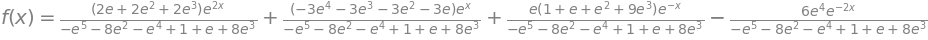

In [17]:
ff = lambda x: C1*sy.exp(-2*x) + C2*sy.exp(-1*x) + C3*sy.exp(x) + C4*sy.exp(2*x)    #On définit la solution analytique.
sy.Eq(f[0], ff(x))  #On 'return' la solution générale du problème avec la valeur numérique des coefficients d'intégration. 

In [18]:
sy.Eq(f[0],ff(x).evalf())

On peut vérifier la valeur des coefficients C grace à la fonction linalg.solve de numpy

In [19]:
A = np.array([[1,1,1,1], [-2, -1, 1, 2], [np.exp(-2), np.exp(-1), np.exp(1), np.exp(2)], [-2*np.exp(-2), -1*np.exp(-1), np.exp(1), 2* np.exp(2)]]) #On définit la matrice des coefficients du système d'équations linéaires
b = np.array([0,0,1, -1])   #On définit le vecteur des conditions initiales
C = np.linalg.solve(A,b)    #On utilise la fonction "linalg.solve" de numpy pour vérifier notre solution
for i in range(4):
    print("C%i ="%(i+1), C[i])

C1 = 3.3522814379441543
C2 = -5.3373917644283235
C3 = 2.603049541508353
C4 = -0.6179392150241841


C'est bien le résultat obtenu par l'autre méthode même si avec numpy on a su obtenir un résultat avec une décimale supplémentaire. On peut maintenant porter la solution sur un graphique.         

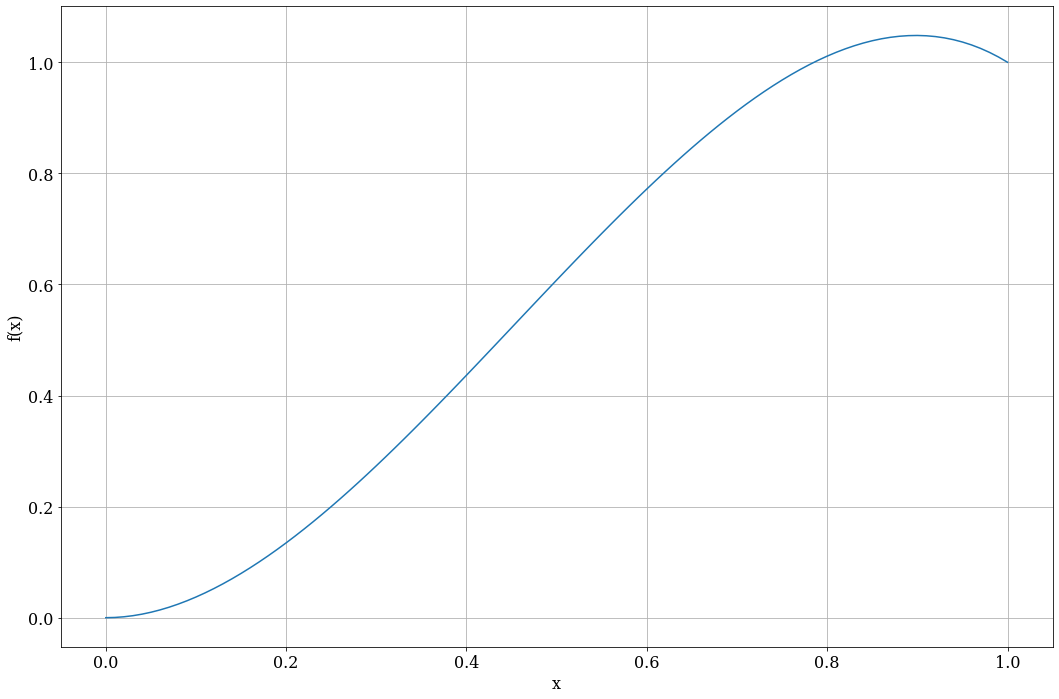

In [20]:
y = np.linspace(0,1,101)    #On discrétise l'intervalle [0,1] pour évaluer la solution analytique en ces points.

f_analytique = lambda x : C1.evalf() * np.exp(-2*x) + C2.evalf() * np.exp(-x) + C3.evalf() * np.exp(x) + C4.evalf() * np.exp(2*x)   #On définit la solution analytique du problème.

#On fait le graphique de la solution analytique du problème posé.
fig = plt.figure(figsize=(15,10))
plt.plot(y,f_analytique(y))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.tight_layout()

## Discrétisation de l'équation différentielle


On discétise les opérateurs différentiels sur un segment de droite tel que $x_0 = 0$ et $x_{nx} = 1$ en utilisant les différences finies centrales au second ordre:
<img src="./Figures/1Ddiscret.png">

\begin{align}
    f(x) &\longrightarrow f_i \\
    \frac{df(x)}{dx} &\longrightarrow \frac{-1/2 f_{i-1} + 1/2 f_{i+1} }{\Delta x} \\
    \frac{d^2f(x)}{dx^2} &\longrightarrow \frac{f_{i-1} - 2 f_i + f_{i+1}}{\Delta x^2} \\
    \frac{d^3f(x)}{dx^3} &\longrightarrow \frac{-1/2 f_{i-2} + f_{i-1} - f_{i+1} + 1/2 f_{i+2}}{\Delta x^3} \\
    \frac{d^4f(x)}{dx^4} &\longrightarrow \frac{f_{i-2} - 4 f_{i-1} + 6 f_i - 4 f_{i+1} + f_{i+2}}{\Delta x^4}
\end{align}

Cela permet d'écrire l'équation différentielle discrétisée
\begin{equation}
    \frac{f_{i-2} - 4 f_{i-1} + 6 f_i - 4 f_{i+1} + f_{i+2}}{\Delta x^4} - 5 \left( \frac{f_{i-1} - 2 f_i + f_{i+1}}{\Delta x^2} \right) + 4 f_i = 0 
\end{equation}

En itérant sur tous les $i$ de l'intérieur du domaine (donc de $i=2$ jusqu'à $i=nx-2$), on peut écrire cette équation comme un système d'équations linéaires $(A x = b)$ et donc on peut le représenter par une matrice

\begin{equation}
    \left(
    \frac{1}{\Delta x^4}
    \begin{pmatrix}
        1 & -4 & 6 & -4 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 1 & -4 & 6 & -4 & 1 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 1 & -4 & 6 & -4 & 1 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 1 & -4 & 6 & -4 & 1 & 0 & \cdots & 0 \\
        \vdots & & & & \ddots & \ddots & \ddots & \ddots & \ddots & & \vdots \\
        0 & 0 & 0 & \cdots & 0 & 1 & -4 & 6 & -4 & 1 & 0 \\
        0 & 0 & 0 & \cdots & \cdots & 0 & 1 & -4 & 6 & -4 & 1
    \end{pmatrix}
    - \frac{5}{\Delta x^2}
    \begin{pmatrix}
        0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 1 & -2 & 1 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 & \cdots & 0 & 0 \\
        \vdots & \vdots & & & & \ddots & \ddots & \ddots & & \vdots & \vdots \\
        0 & 0 & 0 & \cdots & 0 & 0 & 1 & -2 & 1 & 0 & 0 \\
        0 & 0 & 0 & \cdots & \cdots & 0 & 0 & 1 & -2 & 1 & 0 \\
    \end{pmatrix}
    + 4
    \begin{pmatrix}
        0 & 0 & 1 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 0 & 1 & 0 & 0 & \cdots & 0 & 0 \\
        \vdots & \vdots & & & & \ddots & & & \vdots & \vdots \\
        0 & 0 & 0 & \cdots & \cdots & 0 & 0 & 1 & 0 & 0
    \end{pmatrix}
    \right)
    \begin{pmatrix}
        f_{0} \\
        f_{1} \\
        f_2 \\
        f_3 \\
        \vdots \\
        \vdots \\
        f_{nx -1} \\
        f_{nx}
    \end{pmatrix}
    = 
    \begin{pmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        \vdots \\
        \vdots \\
        0 \\
        0 \\
    \end{pmatrix}
\end{equation}

Les 3 matrices dans la première paranthèse sont de taille $nx-4 \times nx$, le vecteurs $f \in \mathbb{R}^{nx}$ et $\vec{0} \in \mathbb{R}^{nx-4}$.

Pour pouvoir résoudre le système d'equation, il manque les 4 itérations aux bords du domaine. On peut trouver ces equations en discrétisant les conditions aux bords:
\begin{align}
    f(0) = 0 &\longrightarrow f_0 = 0 \\
    f'(0) = 0 &\longrightarrow \frac{-f_{-1} + f_1}{2 \Delta x} = 0 \\
    f(1) = 1 &\longrightarrow f_{nx} = 1 \\
    f'(1) = -1 &\longrightarrow \frac{-f_{nx-1} + f_{nx+1}}{2 \Delta x} = -1
\end{align}

Les deux conditions de Neumann donnent 
\begin{align}
    f_{-1} &= f_1 \\
    f{nx+1} &= -2 \Delta x + f_{nx-1}
\end{align}

Pour $i=1$, l'équation différentielle discrétisée est 
\begin{align}
    \frac{f_{-1} - 4f_0 + 6 f_1 - 4f_2 + f_3}{\Delta x^4} - 5 \frac{f_0 -2 f_1 +f_2}{\Delta x^2} + 4 f_1 &= 0 \\
    \frac{- 4f_0 + 7 f_1 - 4f_2 + f_3}{\Delta x^4} - 5 \frac{f_0 -2 f_1 +f_2}{\Delta x^2} + 4 f_1 &= 0 \\
    \frac{7 f_1 - 4f_2 + f_3}{\Delta x^4} - 5 \frac{-2 f_1 +f_2}{\Delta x^2} + 4 f_1 &= 0 \\
\end{align}

Pour $i=nx-1$, l'équation s'écrit comme 
\begin{align}
    \frac{f_{nx-3} - 4 f_{nx-2} + 6 f_{nx-1} - 4 f_{nx} + f_{n+1}}{\Delta x^4} - 5 \frac{f_{nx-2} - 2 f_{nx-1} +f_{nx}}{\Delta x^2} + 4 f_{nx-1} &= 0 \\
    \frac{f_{nx-3} - 4 f_{nx-2} + 7 f_{nx-1} - 4f_{nx}}{\Delta x^4} - 5 \frac{f_{nx-2} - 2 f_{nx-1} + f_{nx}}{\Delta x^2} + 4 f_{nx-1} &= \frac{2 \Delta x}{\Delta x^4} = \frac{2}{\Delta x^3} \\
    \frac{f_{nx-3} - 4 f_{nx-2} + 7 f_{nx-1}}{\Delta x^4} - 5 \frac{f_{nx-2} - 2 f_{nx-1}}{\Delta x^2} + 4 f_{nx-1} &= \frac{4 + 2\Delta x}{\Delta x^4} + \frac{5}{\Delta x^2}
\end{align}

On peut maintenant écrire le système à résoudre sur tout le domaine en tenant compte des conditions aux bords

\begin{equation}
    \left(
    \frac{1}{\Delta x^4}
    \begin{pmatrix}
        1 & 0 & 0 & & & \cdots & & \cdots & & & 0 \\
        -4 & 7 & -4 & 1 & 0 & 0 & & \cdots & \cdots & & 0 \\
        1 & -4 & 6 & -4 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 1 & -4 & 6 & -4 & 1 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 1 & -4 & 6 & -4 & 1 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 1 & -4 & 6 & -4 & 1 & 0 & \cdots & 0 \\
        \vdots & & & & \ddots & \ddots & \ddots & \ddots & \ddots & & \vdots \\
        0 & 0 & 0 & \cdots & 0 & 1 & -4 & 6 & -4 & 1 & 0 \\
        0 & 0 & 0 & \cdots & \cdots & 0 & 1 & -4 & 6 & -4 & 1 \\
        0 & 0 & \cdots & & & \cdots & 0 & 1 & -4 & 7 & -4 \\
        0 & \cdots & & & \cdots &  & & & \cdots & 0 & \Delta x^4 
    \end{pmatrix}
    - \frac{5}{\Delta x^2}
    \begin{pmatrix}
        0 & \cdots & & & & \cdots & & & & \cdots & 0 \\
        1 & -2 & 1 & 0 & 0 & \cdots & & & & \cdots & 0 \\
        0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 1 & -2 & 1 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 & \cdots & 0 & 0 \\
        \vdots & \vdots & & & & \ddots & \ddots & \ddots & & \vdots & \vdots \\
        0 & 0 & 0 & \cdots & 0 & 0 & 1 & -2 & 1 & 0 & 0 \\
        0 & 0 & 0 & \cdots & \cdots & 0 & 0 & 1 & -2 & 1 & 0 \\
        0 & 0 & 0 & \cdots & \cdots & \cdots & 0 & 0 & 1 & -2 & 1 \\
        0 & \cdots & & & & \cdots & & & & \cdots & 0
    \end{pmatrix}
    + 4
    \begin{pmatrix}
        0 & \cdots & & & & \cdots & & & \cdots & 0 \\
        0 & 1 & 0 & \cdots & & & & & \cdots & 0 \\
        0 & 0 & 1 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 0 & 1 & 0 & 0 & \cdots & 0 & 0 \\
        \vdots & \vdots & & & & \ddots & & & \vdots & \vdots \\
        0 & 0 & 0 & \cdots & \cdots & 0 & 0 & 1 & 0 & 0 \\
        0 & 0 & 0 & \cdots & \cdots & \cdots & 0 & 0 & 1 & 0 \\
        0 & \cdots & & & & \cdots & & & \cdots & 0 \\
    \end{pmatrix}
    \right)
    \begin{pmatrix}
        f_{0} \\
        f_{1} \\
        f_2 \\
        f_3 \\
        \vdots \\
        \vdots \\
        \vdots \\
        f_{nx -1} \\
        f_{nx}
    \end{pmatrix}
    = 
    \begin{pmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        \vdots \\
        \vdots \\
        0 \\
        0 \\
        \frac{2}{\Delta x^3} \\
        1
    \end{pmatrix}
\end{equation}

Ici on a des matrices de taille $N \times N$ et des vecteurs de taille $N$.

Or on connait déjà les conditions initiales 
\begin{align}
    f_0 &= 0 \\
    f_{nx} &= 1 \\
\end{align}

Cela permet d'alléger (un peu) les calculs pour l'ordinateur en réduisant le système à $nx-2$ équations 

\begin{equation}
    \left(
    \frac{1}{\Delta x^4}
    \begin{pmatrix}
        7 & -4 & 1 & 0 & 0 & & \cdots & \cdots & 0\\
        -4 & 6 & -4 & 1 & 0 & 0 & 0 & \cdots & 0 \\
        1 & -4 & 6 & -4 & 1 & 0 & 0 & \cdots & 0 \\
        0 & 1 & -4 & 6 & -4 & 1 & 0 & \cdots & 0 \\
        \vdots & & \ddots & \ddots & \ddots & \ddots & \ddots & & \vdots \\
        0 & 0 & \cdots & 0 & 1 & -4 & 6 & -4 & 1 \\
        0 & 0 & \cdots & \cdots & 0 & 1 & -4 & 6 & -4 \\
        0 & \cdots & & & \cdots & 0 & 1 & -4 & 7 \\
    \end{pmatrix}
    - \frac{5}{\Delta x^2}
    \begin{pmatrix}
        -2 & 1 & 0 & 0 & \cdots & & & \cdots & 0 \\
        1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots & 0 \\
        0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots & 0 \\
        0 & 0 & 1 & -2 & 1 & 0 & 0 & \cdots & 0 \\
        0 & 0 & 0 & 1 & -2 & 1 & 0 & \cdots & 0 \\
        \vdots & & & & \ddots & \ddots & \ddots & & \vdots \\
        0 & 0 & \cdots & 0 & 0 & 1 & -2 & 1 & 0 \\
        0 & 0 & \cdots & \cdots & 0 & 0 & 1 & -2 & 1 \\
        0 & 0 & \cdots & \cdots & \cdots & 0 & 0 & 1 & -2 \\
    \end{pmatrix}
    + 4
    \begin{pmatrix}
        1 & 0 & \cdots & & & \cdots & & \cdots & 0 \\
        0 & 1 & 0 & \cdots & & & & \cdots & 0 \\
        0 & 0 & 1 & 0 & 0  & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 1 & 0  & 0 & \cdots & 0 & 0 \\
        0 & 0 & 0 & 0 & 1 & 0  & \cdots & 0 & 0 \\
        \vdots & \vdots & & & & \ddots & & \vdots & \vdots \\
        0 & 0 & 0 & \cdots & \cdots & 0 & 1 & 0 & 0 \\
        0 & 0 & 0 & \cdots & \cdots & \cdots & 0 & 1 & 0 \\
        0 & \cdots & & \cdots & & & \cdots & 0 & 1 \\
    \end{pmatrix}
    \right)
    \begin{pmatrix}
        f_{1} \\
        f_2 \\
        f_3 \\
        \vdots \\
        \vdots \\
        \vdots \\
        f_{nx -1} \\
    \end{pmatrix}
    = 
    \begin{pmatrix}
        0 \\
        0 \\
        0 \\
        \vdots \\
        \vdots \\
        0 \\
        -\frac{1}{\Delta x^4} \\
        \frac{4 + 2\Delta x}{\Delta x^4} + \frac{5}{\Delta x^2} \\
    \end{pmatrix}
\end{equation}

Ceci permet d'obtenir une expression pour la fonction à chaque point de la droite discrétisée.

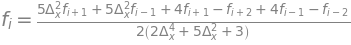

In [21]:
f_2, f_1, fi, f1, f2 = sy.symbols("f_i-2 , f_i-1 , f_i , f_i+1 , f_i+2")
deltax = sy.symbols("Delta_x")
eq = (f_2 - 4*f_1 + 6*fi -4*f1 + f2 ) / deltax**4 - 5*(f_1 - 2*fi + f1) / deltax**2 + 4*fi
sol = sy.solve(eq, fi)[0]
sy.Eq(fi,sy.simplify(sol))

On peut maintenant construire la matrice et le vecteur qui sont associés à notre problème.

In [22]:
#On implémente les paramètres du problème
n = 101
L = 1
dx = L/(n-1)

x = np.zeros(n)
for i in range(n):
    x[i] = i*dx     #On crée un array numpy qui contient toutes les valeurs de x.

In [23]:
A_int = np.zeros([n,n])
for i in range(2,n-2):
    A_int[i, i-2:i+3] = 1 * np.array([1/(dx**4), -4/(dx**4) - 5/(dx**2), 6/(dx**4) + 10/(dx**2) +4, -4/(dx**4) -5/(dx**2), 1/(dx**4)])  #On construit la matrice des coefficients à l'intérieur du domaine.

A_bc = A_int.copy()
A_bc[0,0] = 1
A_bc[-1,-1] = 1
A_bc[1, 0:4] = 1 * np.array([-4/(dx**4) - 5/(dx**2), 7/(dx**4) + 10/(dx**2) + 4, -4/(dx**4) -5/(dx**2), 1/(dx**4)])
A_bc[-2, -4:n] = 1 * np.array([1/(dx**4), -4/(dx**4) -5/(dx**2), 7/(dx**4) + 10/(dx**2) + 4, -4/(dx**4) -5/(dx**2)])    #On implémente les conditions aux bords directement dans la matrice des coefficients

sy.Matrix(A_bc)

⎡    1.0           0.0           0.0           0.0           0.0           0.0
⎢                                                                             
⎢-400050000.0  700100004.0   -400050000.0  100000000.0       0.0           0.0
⎢                                                                             
⎢100000000.0   -400050000.0  600100004.0   -400050000.0  100000000.0       0.0
⎢                                                                             
⎢    0.0       100000000.0   -400050000.0  600100004.0   -400050000.0  1000000
⎢                                                                             
⎢    0.0           0.0       100000000.0   -400050000.0  600100004.0   -400050
⎢                                                                             
⎢    0.0           0.0           0.0       100000000.0   -400050000.0  6001000
⎢                                                                             
⎢    0.0           0.0           0.0           0.0  

In [24]:
b = np.zeros(n)     #On crée la matrice de la fonction source
b[-1] = 1
b[-2] = 2/dx**3     #On implémente les conditions aux bords

Pour vérifier que l'implémentation de la matrice des coefficients qui tient compte des conditions aux bords est correcte, on peut utiliser la fonction "linalg.solve" de numpy et comparer la solution  notre solution analytique.

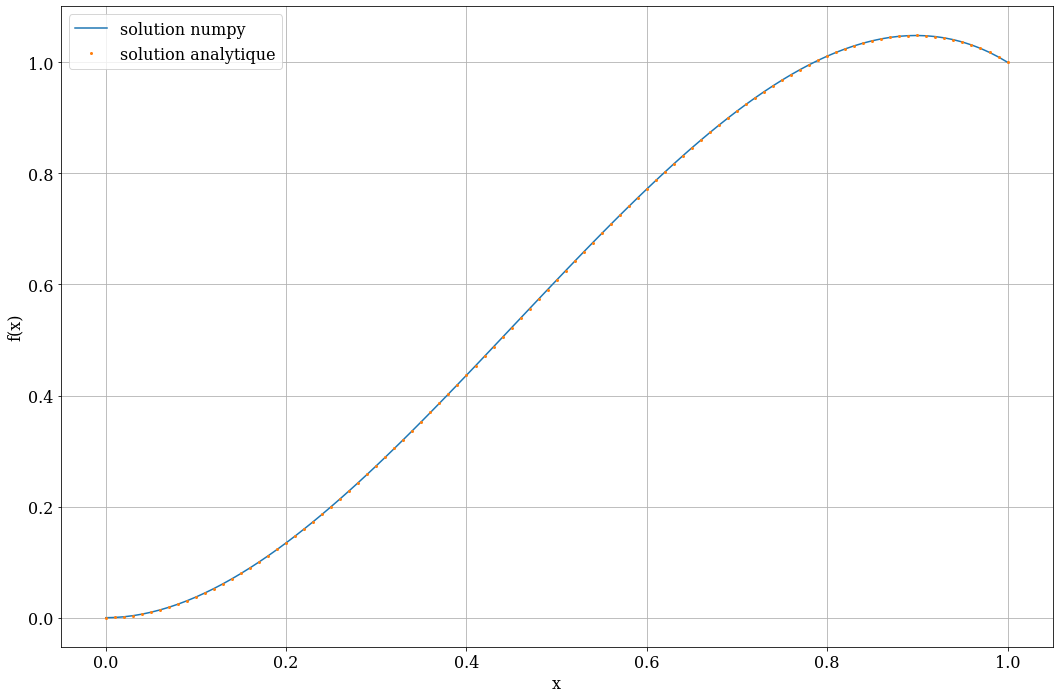

In [25]:
f_numpy = np.linalg.solve(A_bc,b)

fig = plt.figure(figsize=(15,10))
plt.plot(x,f_numpy, label='solution numpy')
plt.plot(x,f_analytique(x),'o',markersize= 2, label="solution analytique")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.tight_layout()

Le résultat obtenu est très similaire à la fonction analytique. La matrice des coefficients est donc correcte. Pour voir a quel point la solution de numpy et la solution analytique sont proches, on peut utiliser la fonction "L2_rel_error" fournie avec l'énoncé du travail.

In [26]:
def L2_rel_error(p, pn):
    ''' Compute the relative L2 norm of the difference
    Parameters:
    ----------
    p : array of float
        array 1
    pn: array of float
        array 2
    Returns:
    -------
    Relative L2 norm of the difference
    '''
    return np.sqrt(np.sum((p - pn)**2)/np.sum(pn**2))

In [27]:
L2_rel_error(f_numpy, f_analytique(x).astype(float))

La norme $L^2$ de la différence entre la solution de numpy et la slution analytique est de l'ordre de $10^{-5}$.

## Question 4

Résoudre l'équation $\frac{d^4 f}{dx^4} - 5 \frac{d^2 f}{dx^2} + 4 f = 0$  avec la méthode Gauss-Seidel vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).

On implémente la méthode de Gauss_Seidel. Dans un premier temps, on définit une fonction "générale" qui résous un système d'équations du type $A x = b$.
La formule itérative de la méthode de Gauss_Seidel est 
\begin{equation}
    x^{k+1}_{i} = \frac{1}{a_{ii}} \left( b_{i} - \sum^{i-1}_{j=1} a_{ij} x^{k+1}_{j} - \sum^{n}_{j=i+1} a_{ij} x^{k}_{j} \right)
\end{equation}

On utilise les paramètres de discrétisation définis plus haut.

In [28]:
import numba    #On utilise numba pour réduire le temps de calcul
from numba import jit 

In [29]:
@jit(nopython = True)
def GS(A,b,ini_guess, maxiter=2000000, rtol=1e-8):
    ''' Résous l'quation matricielle Ax = b
    Paramètres:
    ----------
    A : matrice des coefficient (numpy.array)
    b : vecteur qui continent les termes de source (numpy.array)
    ini_guess : vecteur qui contient une supposition de la solution (numpy.array)
    Returns:
    -------
    x : solution du système d'équation Ax = b (numpy.array)
    ite : nombre d'itération
    diff : norme L2 entre deux itérations successives 
    '''
    n = ini_guess.shape[0]  #On récupère la taille des éléments dans l'input.
    diff = rtol + 1     #On définit la différence entre deux itérations successives.
    ite = 0     #On initialise un compteur pour le nombre d'itération.
    x = ini_guess.copy()
    while diff > rtol and ite < maxiter:    #On itère jusqu'à un nombre d'itération maximal ou bien jusqu'à obtenir une convergence satisfaisante.
        x_new = x.copy()    #On copie la solution afin de pouvoir calculer la différence en norme L2.
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]   #On applique l'algorithme de Gauss-Seidel avec des updates de la solution.
        diff = np.sqrt(np.sum((x - x_new)**2)/np.sum(x_new**2))   #On met à jour la différence en norme L2.
        ite += 1    #On met à jour le nombre d'itérations.
        x = x_new   #On met à jour la solution.
    return x, ite, diff

On va maintenant utiliser cette fonction pour résoudre le problème grace à la matrice des coefficients $A_bc$ qui tient compte des conditions initiales. Je choisis d'utiliser comme solution initiale la fonction 
\begin{equation}
    f : [0,1] \longrightarrow \mathbb{R} : x \mapsto x
\end{equation}
Le choix de cette fonction de départ me permet de faire moins d'itération que si j'avais choisi la fonction nulle.

In [ ]:
f_GS, ite_GS, diff_GS = GS(A_bc,b,x)

In [ ]:
print("Méthode de Gauss-Seidel: {} itérations ".format(ite_GS) + "pour atteindre une différence entre deux itérations successives de {}" .format(diff_GS))
f_GS

Comparons ce résultat graphiquement et en utilisant la norme $L^2$ avec la solution analytique obtenue à la question 3.

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(x,f_GS,label="Gauss-Seidel")
plt.plot(x,f_analytique(x),'o',markersize=2.5, label="Solution analytique")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.tight_layout()

In [ ]:
L2_rel_error(f_GS, f_analytique(x).astype(float))

Cette façon de résoudre l'équation n'est pas optimale puisquelle demande beaucoup d'itérations et peut tourner pendant plusieurs minutes (si on utilise pas Numba) pour fournir un résultat. Aussi la norme $L^2$ de la différence entre la solution analytique et la solution par la méthode de Gauss-Seidel est de l'ordre de $10^{-3}$, ce qui est moins bien que la solution de numpy.

La méthode de Gauss-Seidel implémentée ci-dessus fonctionne pour n'importe quelle matrice associée à un système d'équations linéaires (moyennant les conditions de convergence de la méthode de Gauss-Seidel). Mais il est possible d'optimiser cette méthode de résolution à notre équation en se rendant compte que la matrice des coefficients $A$ de l'équation est diagonale par 'blocs' et que la matrice $b$ est nulle quasiment partout sauf là où on a des conditions aux bords non-nulles.


Essayons d'implémenter un version optimisée à notre problème de la méthode de Gauss-Seidel.

In [ ]:
@jit(nopython = True)
def Eq_GS(p0, maxiter=2000000, rtol=1e-8):
    ''' Donne la solution au problème posé par la méthode de Gauss-Seidel
    Paramètres:
    ----------
    p0 : supposition initiale de la solution (numpy.array)
    Returns:
    -------
    p : la solution de l'équation différentielle (numpy.array)
    ite : le nombre d'itérations
    diff : norme L2 entre deux itérations successives
    '''
    n = p0.shape[0] #On récupère la taille des éléments dans l'input.
    p = p0.copy()   #On effectue une copie de la supposition initiale
    diff = rtol + 1 #On définit la différence entre deux itérations successives.
    ite = 0         #On initialise un compteur pour le nombre d'itérations.
    while diff > rtol and ite < maxiter:    #On itère jusqu'à un nombre d'itération maximal ou bien jusqu'à obtenir une convergence satisfaisante.
            pn = p.copy()   #On copie la solution afin de pouvoir calculer la différence en norme L2.
            for i in range(2,n-2):  #On update la solution sur l'intérieur du domaine.
                s1 = (p[i-2] - 4*p[i-1])/(dx**4) - 5*(p[i-1] / (dx**2))
                s2 = (-4*p[i+1] + p[i+2])/(dx**4) - 5*(p[i+1]/(dx**2))
                aii = 1/(6/(dx**4) + 10/(dx**2) + 4)
                p[i] = aii * (0 - s1 - s2)
            #On applique les conditions aux bords.
            p[0] = 0.
            si1 = - 4*p[0]/(dx**4) - 5*(p[0]/(dx**2))
            si2 = (- 4*p[2] + p[3])/(dx**4) - 5*(p[2]/(dx**2))
            p[1] = 1/(7/(dx**4) + 10/(dx**2) + 4) * (0 - si1 - si2)
            p[-1] = 1.
            sf1 = (p[-4] - 4*p[-3])/(dx**4) - 5*(p[-3] / (dx**2))
            sf2 = (-4*p[-1])/(dx**4) - 5*(p[-1]/(dx**2))
            p[-2] = 1/(7/(dx**4) + 10/(dx**2) + 4) * (2/(dx**3) - sf1 - sf2)

            diff = np.sqrt(np.sum((p - pn)**2)/np.sum(pn**2))  #On met à jour la différence en norme L2.
            ite += 1    #On met à jour le nombre d'itérations.

    return p, ite, diff 

De nouveau, lorsque j'exécute la fonction, je choisis la fonction identité sur le segment $[0,1]$ comme supposition de départ.

In [ ]:
f_GS2, ite_GS2, diff_GS2 = Eq_GS(x)    

In [ ]:
print("Méthode de Gauss-Seidel 'optimisée': {} itérations ".format(ite_GS2) + "pour atteindre une différence entre deux itérations successives de {}" .format(diff_GS2))
f_GS2

Comparons ce résultat graphiquement et en utilisant la norme $L^2$ avec la solution analytique obtenue à la question 3.

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(x,f_GS2,label="Gauss-Seidel 'optimisé'")
plt.plot(x,f_analytique(x),'o',markersize=2.5, label="Solution analytique")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.tight_layout()

In [ ]:
L2_rel_error(f_GS2, f_analytique(x).astype(float))

La norme $L^2$ de la différence avec la solution analytique est du même ordre de grandeur qu'avec la fonction précédente.

Cette méthode ne change rien au nombre d'itérations et à la vitesse d'exécution sans Numba. On peut peut-être l'améliorer en réduisant la taille du système a résoudre via les conditions aux bords comme expliqué plus haut. Cela ne changerait probablement pas grand chose au nombre d'itération car à mon avis, ce grand nombre d'itération vient du fait que la matrice $A$ des coefficients de l'équation différentielle discrétisée provoque une convergence lente de la solution par la méthode de Gauss-Seidel. Pour devoir faire moins d'itération, et donc obtenir le résultat plus rapidement, il faudrait donner à l'algorithme une meilleure approximation de la solution en entrée. On pourrait par exemple prendre un développement limité de Taylor ou bien déveloper en série de Fourier et ne garder que les termes avec les plus grands coefficients de Fourier. On pourrait faire ça uniquement car il y a une solution analytique à notre problème or dans la plupart des cas, si on cherche à résoudre une équation différentielle numériquement c'est parce qu'on ne peut pas trouver de solution analytique. 


Cherchons une supposition de solution plus "proche" de la solution analytique que la fonction identité. Prenons par exemple la fonction 
\begin{equation}
    f : [0,1] \longrightarrow \mathbb{R} : x \mapsto 0.5 cos((0.57 \ 2 \pi x) + \pi) + 0.5
\end{equation}

Comparons les graphes de la fonction identité, la solution analytique et de notre fonction 'test'.

In [ ]:
cs = lambda x: .5*np.cos(.57*x*(2*np.pi) + np.pi) + .5


fig = plt.figure(figsize=(15,10))
plt.plot(x, x, label='fonction identité')
plt.plot(x,f_analytique(x), label='solution analytique')
plt.plot(x, cs(x), label='fonction test')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.tight_layout()

Appliquons notre résolution à cette fonction proche pour voir comment change le nombre d'itérations.

In [ ]:
f_GS_test, ite_GS_test, diff_GS_test = Eq_GS(cs(x))

In [ ]:
print("Méthode de Gauss-Seidel 'optimisée' avec fonction de départ 'proche' de la solution: {} itérations ".format(ite_GS_test) + "pour atteindre une différence entre deux itérations successives de {}" .format(diff_GS_test))

fig = plt.figure(figsize=(15,10))
plt.plot(x, f_GS_test, label='Gauss-Seidel')
plt.plot(x,f_analytique(x), 'o', markersize=3, label='solution analytique')
plt.plot(x, cs(x), 'o', markersize=1.5, label='fonction de départ')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.tight_layout()

In [ ]:
L2_rel_error(f_GS_test, f_analytique(x).astype(float))

On voit que ce qui a de l'influence sur le nombre d'itérations et la vitesse d'exécution (sans Numba) de l'algorithme est la solution de départ qu'on donne en input.

## Question 5

Résoudre l'équation $\frac{d^4 f}{dx^4} - 5 \frac{d^2 f}{dx^2} + 4 f = 0 $ avec la méthode du gradient conjugué vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).

In [ ]:
def CG(A, b, p0, maxiter = 20000, rtol = 1e-8):
    ''' Résolution du système d'équation Ax = b
    Paramètres:
    ----------
    A : matrice des coefficient (numpy.array)
    b : vecteur qui continent les termes de source (numpy.array)
    p0 : vecteur qui contient une supposition de la solution (numpy.array)
    Returns:
    -------
    p : la solution de l'équation différentielle (numpy.array)
    ite : le nombre d'itérations
    diff : norme L2 entre deux itérations successives
    '''
    p = p0.copy()   #On copie la supposition de la solution.
    r = b - np.dot(A, p0)   #On calcule le résidus initial.
    d = r.copy()    #On donne la "direction" initiale.
    Ad = np.dot(A,d)    #On crée une variable pour le produit matrice-vecteur.
    diff = rtol + 1 #On assigne la norme L2 entre 2 itérations successives.
    ite = 0 #On initialise un compteur por le nombre d'itérations.
    
    while diff > rtol and ite < maxiter:    #On itère jusqu'à la convergence ou bien jusqu'à un nombre d'itération maximal.
        pk = p.copy()   #On copie la solution pour pouvoir calculer la norme L2 entre 2 itérations.
        rk = r.copy()
        #On calcule le produit de la matrice des coefficients avec le vecteur "direction"
        Ad = np.dot(A,d)
        #On calcule la longueur du pas
        alpha = np.sum((r * r)) / np.sum((d * Ad))
        #On update la solution
        p = pk + (alpha * d)
        #On update le résidus
        r = rk - (alpha * Ad)
        #On calcule la nouvelle "direction"
        beta = np.sum(r * r) / np.sum((rk * rk))
        d = r + (beta * d)
        diff = L2_rel_error(p, pk)  #On met à jour la convergence.
        ite += 1    #On met à jourle nombre d'itérations.

    return p, ite, diff 

Utilisons la méthode du gradient conjugué pour résoudre notre problème. On utilise pour ça la matrice des coefficients qui tient compte des conditions aux bords $(A_{bc})$ et le vecteur $b$ définis plus haut. Et la fonction de départ est la fonction identité sur le segment $[0,1]$.

In [ ]:
f_CG, ite_CG, diff_CG = CG(A_bc,b,x)
print("Gradient conjugué: {} itérations ".format(ite_CG) + "pour atteindre une différence entre deux itérations successives de {}" .format(diff_CG))
f_CG

Comparons ce résultat graphiquement et en utilisant la norme $L^2$ avec la solution analytique obtenue à la question 3.

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(x,f_CG,label="Gradient conjugué")
plt.plot(x,f_analytique(x),'o',markersize=2.5, label="Solution analytique")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.tight_layout()

In [ ]:
L2_rel_error(f_CG, f_analytique(x).astype(float))

Cette méthode fonctionne beaucoup mieux que la méthode de Gauss-Seidel pour résoudre l'équation différentielle. Elle effectue beaucoup moins d'itérations et est bien plus rapide. La norme $L^2$ de la différence avec la solution analytique est aussi beaucoup plus petite qu'avec la méthode de Gauss-Seidel.

Même si ce résultat est déjà satisfaisant, on peut "optimiser" notre code en l'adaptant à notre problème.

In [ ]:
def Eq_CG(p0, b, maxiter = 20000, rtol = 1e-8):
    '''Résous l'éqiation différentielle donnée avec les conditions aux bords
    Paramètres:
    ----------
    p0 : supposition de la solution initiale (numpy.array)
    b : vecteur de la fonction source (numpy.array)
    Returns:
    -------
    p : la solution de l'équation différentielle (numpy.array)
    ite : le nombre d'itérations
    diff : norme L2 entre deux itérations successives
    '''
    def A(p):
        '''Calcul du produit de la matrice des coefficients de l'équation discrétisée à l'intérieur du domaine avec le vecteur des solutions
        Paramètres:
        ----------
        p : un vecteur (numpy.array)
        Returns:
        -------
        Ap : le produit de la matrice des coefficients de l'équation discrétisée à l'intérieur du domaine avec le vecteur des solutions
        '''
        Ap = (p[:-4] - 4*p[1:-3] + 6*p[2:-2] - 4*p[3:-1] + p[4:])/(dx**4) - 5 * (p[1:-3] - 2*p[2:-2] + p[3:-1])/(dx**2) + 4 * p[2:-2]
        return Ap
    
    n = len(p0) #On récupère la taille des éléments en input
    p = p0.copy()
    r = np.zeros(n) #On crée une variable pour le résidus initial
    Ad = np.zeros(n) #On crée une variable qui sera assignée au produit matriciel 
    diff = rtol + 1 #différence initiale
    ite = 0 #On initialise un compteur d'itérations
    #On calcule le résidu
    r[2:-2] = b[2:-2] - A(p)
    #On tient compte des conditions de Neumann
    r[1] = b[1] - (- 4*p[0] + 7*p[1] - 4*p[2] + p[3])/(dx**4) - 5 * (p[0] - 2*p[1] + p[2])/(dx**2) + 4 * p[1]
    r[-2] = b[-2] - (p[-4] - 4*p[-3] + 7*p[-2] - 4*p[-1])/(dx**4) - 5 * (p[-3] - 2*p[-2] + p[-1])/(dx**2) + 4 * p[-2]
    d = r.copy()    #On donne la première "direction"
    while diff > rtol and ite < maxiter:    #On itère jusqu'à convergence ou un nombre d'itération maximal
        pk = p.copy()
        rk = r.copy()
        #On calcule le produit matriciel des coefficients aveec le vecteur "direction"
        Ad[2:-2] = A(d)
        #On tient compte des conditions de Neumann
        Ad[1] = (- 4*d[0] + 7*d[1] - 4*d[2] + d[3])/(dx**4) - 5 * (d[0] - 2*d[1] + d[2])/(dx**2) + 4 * d[1]
        Ad[-2] = (d[-4] - 4*d[-3] + 7*d[-2] - 4*d[-1])/(dx**4) - 5 * (d[-3] - 2*d[-2] + d[-1])/(dx**2) + 4 * d[-2]
        #On calcule la longueur du pas
        alpha = np.sum(r * r) / np.sum(d * Ad)
        #On update la solution
        p = pk + alpha * d
        #On update le résidus
        r = rk - alpha * Ad
        #On calcule une nouvelle "direction"
        beta = np.sum(r * r) / np.sum(rk * rk)
        d = r + beta * d
        #On applique les conditions de Dirichlet
        p[0] = 0
        p[-1] = 1
        #On update les conditions d'itération
        diff = L2_rel_error(p, pk)  #On met à jour la norme L2 de la différence entre 2 itérations successives. 
        ite += 1    #On ajoute 1 au compteur d'itérations.
    return p, ite, diff

De nouveau, lorsque j'exécute la fonction, je choisis la fonction identité sur le segment $[0,1]$ comme supposition de départ.

In [ ]:
f_CG2, ite_CG2, diff_CG2 = Eq_CG(x, b)
print("Gradient conjugué 'optimisé': {} itérations ".format(ite_CG2) + "pour atteindre une différence entre deux itérations successives de {}" .format(diff_CG2))
f_CG2

Comparons ce résultat graphiquement et en utilisant la norme $L^2$ avec la solution analytique obtenue à la question 3.

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(x,f_CG2,label="Gradient conjugué 'optimisé'")
plt.plot(x,f_analytique(x),'o',markersize=2.5, label="Solution analytique")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.tight_layout()

In [ ]:
L2_rel_error(f_CG2, f_analytique(x).astype(float))

Il n'y a pas de différence flagrante avec l'implémentation précédente de la méthode du gradient conjugué. Dans les deux cas, cette méthode est beaucoup plus efficace pour résoudre le problème que la méthode de Gauss-Seidel et bien bien plus précise aussi puisque la norme $L^2$ de la différence entre la solution par le gradient conjugué et la solution analytique est de l'ordre de $10^{-5}$ ce qui est le même ordre de grandeur que la méthode de résolution utilisée par numpy (numpy.linalg.solve). Si on souhaite vraiment départager la méthode du gradient conjugué et la fonction numpy, on peut regarder le temps ques ces méthodes mettent à résoudre le problème.

In [ ]:
%%timeit
np.linalg.solve(A_bc,b)

In [ ]:
%%timeit
Eq_CG(x, b)

La fonction de numpy est la plus rapide et est donc la meilleure méthode.

## Références


Numerical MOOC : [https://github.com/bknaepen/numerical-mooc/tree/master/lessons/05_relax](https://github.com/bknaepen/numerical-mooc/tree/master/lessons/05_relax)

Méthode des différences finies : [https://en.wikipedia.org/wiki/Finite_difference_coefficient#Central_finite_difference](https://en.wikipedia.org/wiki/Finite_difference_coefficient#Central_finite_difference)

Méthode de Gauss-Seidel : [https://en.wikipedia.org/wiki/Gauss–Seidel_method#Algorithm](https://en.wikipedia.org/wiki/Gauss–Seidel_method#Algorithm)

Méthode du gradient conjugué : [https://en.wikipedia.org/wiki/Conjugate_gradient_method#As_an_iterative_method](https://en.wikipedia.org/wiki/Conjugate_gradient_method#As_an_iterative_method)